<a href="https://colab.research.google.com/github/Shammachale0102/ML/blob/main/ML_Assi_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing

## **Loading the Dataset**
First we load the dataset and find out the number of columns, rows, NULL values, etc.

In [5]:
df = pd.read_csv('/content/uber.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98305 entries, 0 to 98304
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         98305 non-null  int64  
 1   key                98305 non-null  object 
 2   fare_amount        98304 non-null  float64
 3   pickup_datetime    98304 non-null  object 
 4   pickup_longitude   98304 non-null  float64
 5   pickup_latitude    98304 non-null  float64
 6   dropoff_longitude  98303 non-null  float64
 7   dropoff_latitude   98303 non-null  float64
 8   passenger_count    98304 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 6.8+ MB


In [7]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [8]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9.830500e+04,98304.000000,98304.000000,98304.000000,98303.000000,98303.000000,98304.000000
mean,2.771354e+07,11.383916,-72.526251,39.952988,-72.546192,39.921609,1.677205
std,1.601510e+07,9.906673,11.624568,9.103290,15.416406,7.316085,1.298595
min,4.800000e+01,-49.570000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382532e+07,6.000000,-73.992018,40.734835,-73.991412,40.733703,1.000000
50%,2.776574e+07,8.500000,-73.981802,40.752628,-73.980095,40.752948,1.000000
75%,4.154489e+07,12.500000,-73.967162,40.767149,-73.963802,40.768087,2.000000
max,5.542285e+07,350.000000,57.418457,1644.421482,1153.572603,872.697628,6.000000


## **Cleaning**

In [9]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)

In [10]:
df.isna().sum()

fare_amount          1
pickup_datetime      1
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    2
dropoff_latitude     2
passenger_count      1
dtype: int64

#### Remove null rows

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

#### Fix data type of `pickup_datetime` from `Object` to `DateTime`

In [13]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')

#### Separating the date and time into separate columns for more usability.

In [14]:
df= df.assign(
    second = df.pickup_datetime.dt.second,
    minute = df.pickup_datetime.dt.minute,
    hour = df.pickup_datetime.dt.hour,
    day= df.pickup_datetime.dt.day,
    month = df.pickup_datetime.dt.month,
    year = df.pickup_datetime.dt.year,
    dayofweek = df.pickup_datetime.dt.dayofweek
)
df = df.drop('pickup_datetime',axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98303 entries, 0 to 98303
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        98303 non-null  float64
 1   pickup_longitude   98303 non-null  float64
 2   pickup_latitude    98303 non-null  float64
 3   dropoff_longitude  98303 non-null  float64
 4   dropoff_latitude   98303 non-null  float64
 5   passenger_count    98303 non-null  float64
 6   second             98303 non-null  int64  
 7   minute             98303 non-null  int64  
 8   hour               98303 non-null  int64  
 9   day                98303 non-null  int64  
 10  month              98303 non-null  int64  
 11  year               98303 non-null  int64  
 12  dayofweek          98303 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 10.5 MB


In [16]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,6,52,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,56,4,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,0,45,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,21,22,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,0,47,17,28,8,2014,3


## **Haversine Formula**
Calculatin the distance between the pickup and drop co-ordinates using the Haversine formual for accuracy.

![](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-7b7d66229e4a0b6c7bbf52b95a807dc4_l3.svg)

In [17]:
incorrect_coordinates = df.loc[
    (df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
    (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
    (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
    (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)
]

df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [18]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    long1, lati1, long2, lati2 = map(np.radians, [longitude1, latitude1, longitude2, latitude2])
    dist_long = long2 - long1
    dist_lati = lati2 - lati1
    a = np.sin(dist_lati/2)**2 + np.cos(lati1) * np.cos(lati2) * np.sin(dist_long/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) * 6371
    # long1,lati1,long2,lati2 = longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]
    # c = sqrt((long2 - long1) ** 2 + (lati2 - lati1) ** 2)asin

    return c

In [19]:
df['Distance'] = distance_transform(
    df['pickup_longitude'],
    df['pickup_latitude'],
    df['dropoff_longitude'],
    df['dropoff_latitude']
)

In [20]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,6,52,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,56,4,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,0,45,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,21,22,8,26,6,2009,4,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,0,47,17,28,8,2014,3,4.475450


## **Outliers**
We can get rid of the trips with very large distances that are outliers as well as trips with 0 distance.

Text(0, 0.5, 'fare_amount')

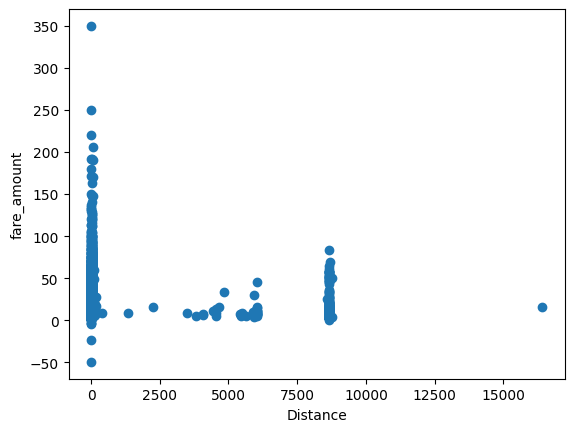

In [21]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

<Axes: >

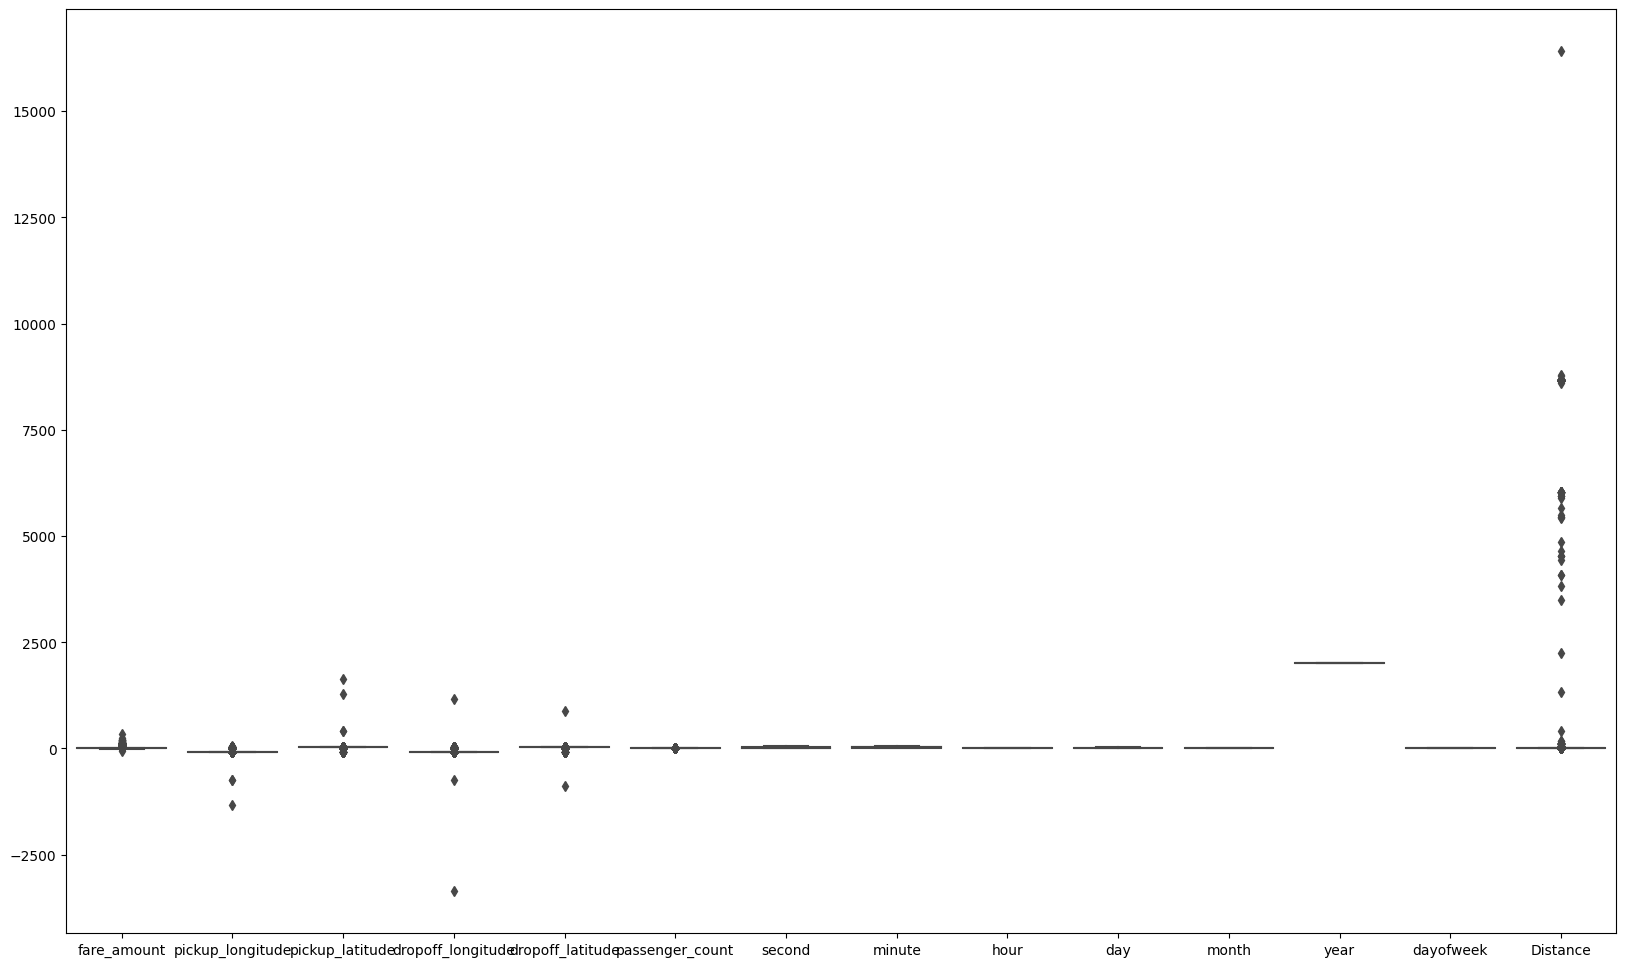

In [22]:
plt.figure(figsize=(20,12))
sns.boxplot(data = df)

In [23]:
df.drop(df[df['Distance'] >= 60].index, inplace = True)
df.drop(df[df['fare_amount'] <= 0].index, inplace = True)

df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index, inplace = True )
df.drop(df[(df['fare_amount']<100) & (df['Distance']>100)].index, inplace = True )

Text(0, 0.5, 'fare_amount')

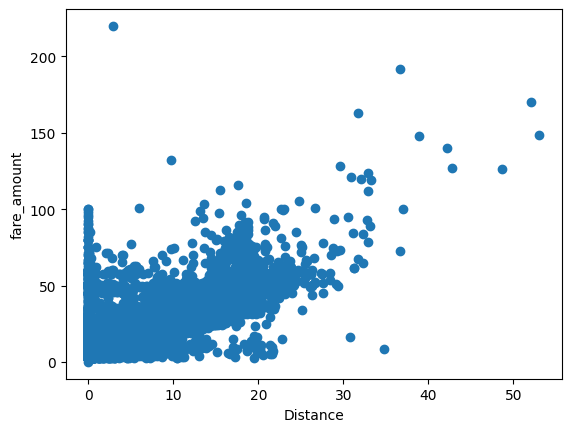

In [24]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

## **Coorelation Matrix**
To find the two variables that have the most inter-dependence

In [25]:
corr = df.corr()

corr.style.background_gradient(cmap='BuGn')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek,Distance
fare_amount,1.000000,0.011929,-0.011853,0.011546,-0.011810,0.007449,-0.001357,-0.003848,-0.014145,0.005472,0.025436,0.117531,-0.000890,0.856941
pickup_longitude,0.011929,1.000000,-0.963486,0.999992,-0.980800,0.000868,-0.015974,0.005434,0.003130,0.004658,-0.006992,0.003194,0.001392,-0.116356
pickup_latitude,-0.011853,-0.963486,1.000000,-0.963487,0.982320,-0.002447,0.017871,-0.004855,-0.003385,-0.008711,0.008085,-0.006090,-0.003421,0.111526
dropoff_longitude,0.011546,0.999992,-0.963487,1.000000,-0.980799,0.000871,-0.015926,0.005454,0.002903,0.004673,-0.006979,0.003170,0.001483,-0.116596
dropoff_latitude,-0.011810,-0.980800,0.982320,-0.980799,1.000000,-0.002159,0.018708,-0.005490,-0.002645,-0.008690,0.008260,-0.006254,-0.003137,0.108499
passenger_count,0.007449,0.000868,-0.002447,0.000871,-0.002159,1.000000,-0.214803,0.001580,0.010147,0.002604,0.010978,0.003314,0.038386,0.004674
second,-0.001357,-0.015974,0.017871,-0.015926,0.018708,-0.214803,1.000000,0.001601,-0.015459,-0.005832,-0.050385,0.080446,-0.000861,-0.001096
minute,-0.003848,0.005434,-0.004855,0.005454,-0.005490,0.001580,0.001601,1.000000,0.001954,-0.007205,-0.004439,-0.001342,-0.005232,-0.004913
hour,-0.014145,0.003130,-0.003385,0.002903,-0.002645,0.010147,-0.015459,0.001954,1.000000,0.005265,-0.007000,0.004084,-0.089873,-0.025513
day,0.005472,0.004658,-0.008711,0.004673,-0.008690,0.002604,-0.005832,-0.007205,0.005265,1.000000,-0.016995,-0.012754,0.003879,0.004480


# **Standardization**
For more accurate results on our linear regression model

In [26]:
X = df['Distance'].values.reshape(-1, 1)        #Independent Variable
y = df['fare_amount'].values.reshape(-1, 1)     #Dependent Variable

In [27]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(y)
print(y_std)

x_std = std.fit_transform(X)
print(x_std)

[[-0.39898926]
 [-0.37825156]
 [ 0.16092864]
 ...
 [-0.34714501]
 [ 0.06760899]
 [-0.62710397]]
[[-0.43801178]
 [-0.22306098]
 [ 0.49285782]
 ...
 [-0.31617863]
 [ 0.15029966]
 [-0.56924775]]


# **Splitting the Dataset**
Training and Test Set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

# **Simple Linear Regression**
Training the simple linear regression model on the training set

In [29]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))

Training set score: 0.74
Test set score: 0.7201632


In [30]:
y_pred = l_reg.predict(X_test)

result = pd.DataFrame()
result[['Actual']] = y_test
result[['Predicted']] = y_pred

result.sample(10)

,Actual,Predicted
10589,1.239289,1.031419
9827,-0.492309,-0.198732
3910,-0.253825,-0.199555
6439,1.104494,1.052661
12870,-0.295301,-0.140106
17225,-0.917432,-0.775315
2037,-0.347145,-0.013389
8103,-0.585629,-0.455643
14004,-0.212350,-0.247917
7201,-0.243457,-0.301272


In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 0.261961068385953
Mean Absolute % Error: 1.5438385195268132
Mean Squared Error: 0.2750078744778423
Root Mean Squared Error: 0.5244119320513619
R Squared (R²): 0.8486242912389316


#### **Visualization**

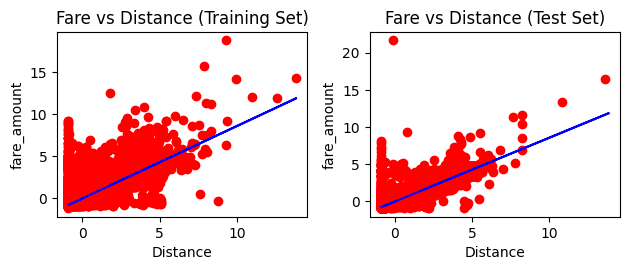

In [32]:
plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.title("Fare vs Distance (Training Set)")
plt.ylabel("fare_amount")
plt.xlabel("Distance")

plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set)")

plt.tight_layout()
plt.show()

In [33]:
cols = ['Model', 'RMSE', 'R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_metrics = pd.DataFrame([[
     "Linear Regresion model",
     np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
     np.sqrt(metrics.r2_score(y_test, y_pred))
]], columns = cols)

result_tabulation = pd.concat([result_tabulation, linreg_metrics], ignore_index=True)

result_tabulation

,Model,RMSE,R-Squared
0,Linear Regresion model,0.524412,0.848624


# **RandomForestRegressor**
Training the RandomForestRegressor model on the training set

In [34]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

# fit the regressor with training dataset
rf_reg.fit(X_train, y_train)

<ipython-input-34-23bf85fdec00>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=10)

In [35]:
# predict the values on test dataset using predict()
y_pred_RF = rf_reg.predict(X_test)

result = pd.DataFrame()
result[['Actual']] = y_test
result['Predicted'] = y_pred_RF

result.sample(10)

,Actual,Predicted
10035,1.073387,0.848072
5604,-0.710055,-0.703004
15066,-0.606366,-0.319564
18361,-0.243457,-0.043545
19424,-0.606366,-0.656690
16754,-0.751530,-0.661943
3475,-0.668579,-0.666333
13453,-0.170875,-0.025192
4040,-0.253825,-0.199285
17174,-0.087924,-0.281925


In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_RF))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred_RF))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred_RF)))

Mean Absolute Error: 0.30007808361749744
Mean Absolute % Error: 1.6394861779982113
Mean Squared Error: 0.3240085785235908
Root Mean Squared Error: 0.5692175142452934
R Squared (R²): 0.8187197731734912


#### **Visualization**

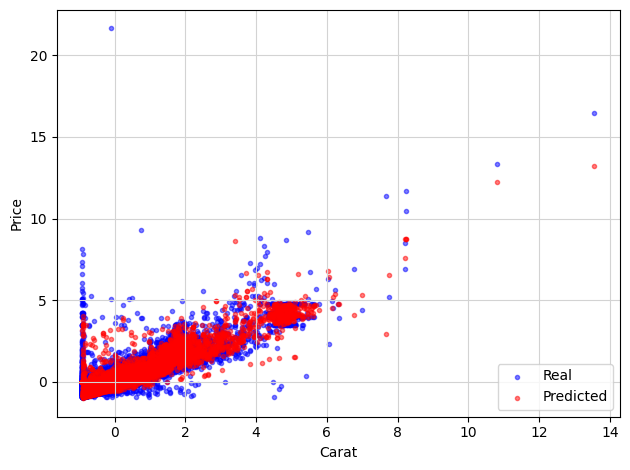

In [37]:
# Build scatterplot
plt.scatter(X_test, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(X_test, y_pred_RF, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')


plt.tight_layout()
plt.show()

In [38]:
# compile the required information
random_forest_metrics = pd.DataFrame([[
     "Random Forest Regressor model",
     np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)),
     np.sqrt(metrics.r2_score(y_test, y_pred_RF))
]], columns = cols)

result_tabulation = pd.concat([result_tabulation, random_forest_metrics], ignore_index=True)

result_tabulation

,Model,RMSE,R-Squared
0,Linear Regresion model,0.524412,0.848624
1,Random Forest Regressor model,0.569218,0.818720
